In [8]:
#선형 대수
import numpy as np

#numpy 와 호환되는 자료구조(Series, DataFrame), 기술 통계, 데이터 전처리
import pandas as pd

#시각화
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#운영체제
import platform

#시각화, 데이터 제공
import seaborn as sns

#통계
import scipy as sp
from scipy import stats

#통계
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

#데이터 전처리 & 머신러닝
import sklearn

%matplotlib inline

# 그래프의 한글 처리 부분
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
#그래프의 음수 출력을 위한 설정
matplotlib.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3
# DataFrame의 출력을 소수점 이하 3자리로 제한 
pd.set_option('precision', 3)

#그림의 폰트 설정
plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정

#그림의 색상값을 변수로 설정
gray = {"facecolor": "gray"}
black = {"facecolor": "black"}
red = {"facecolor": "red"}
green = {"facecolor": "green"}
blue = {"facecolor": "blue"}

# 미적분

## 함수

### 디셔너리를 이용한 함수의 구현

In [3]:
# 입력이 1, 2, 3, 4, 5 이고 출력은 곱하기 2를 해서 만들어지는 경우
dict_fun = {1:2, 2:4, 3:6, 4:8, 5:10}
print(dict_fun[2])

4


### 함수 정의

In [7]:
def double_num(x):
    return 2 * x

x = 10
y = double_num(x)
print(y)


#자료형의 힌트를 이용한 정의
def double_num_hint(x: int) -> int:
    return 2 * x

y = double_num_hint(10)
print(y)

20
1212


### 불연속 함수 - 특정 조건이나 값을 기준으로 출력되는 값이 갑자기 변하는 함수

In [12]:
#numpy 의 sign 함수
print(np.sign(10))
print(np.sign(0))
print(np.sign(-1))

#단위 계단 함수
def heaviside_step(x) -> float:
    #대입된 매개변수가 numpy 의 ndarray 라면 - 자료형을 확인
    if isinstance(x, np.ndarray):
        return np.where(x >= 0 , 1.0, 0.0)
    else:
        return 1.0 if x >= 0 else 0.0
    
print(heaviside_step(10))
print(heaviside_step(np.array([10, 20, 30])))
print(heaviside_step(-1))    

1
0
-1
1.0
[1. 1. 1.]
0.0


### ReLU 함수

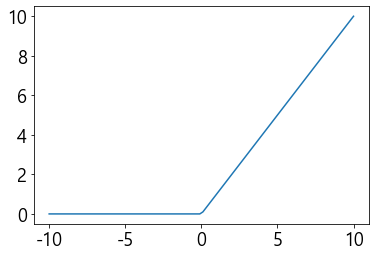

In [13]:
#양수는 그대로 출력하고 음수는 0으로 출력하는 함수
xx = np.linspace(-10, 10, 100)
plt.plot(xx, np.maximum(xx, 0))
plt.show()

### 지수 함수

In [14]:
#오일러 수 확인
print(np.e)

#지수 함수를 이용해서 구한 값 확인
print(np.exp(-10), np.exp(-1), np.exp(0), np.exp(1), np.exp(10))

2.718281828459045
4.5399929762484854e-05 0.36787944117144233 1.0 2.718281828459045 22026.465794806718


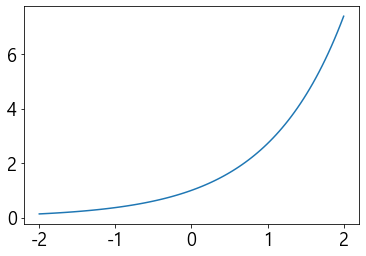

In [15]:
xx = np.linspace(-2, 2, 100)
yy = np.exp(xx)

#데이터 값이 증가할 때 조금 더 빠른 속도로 증가
plt.plot(xx, yy)
plt.show()

### 로지스틱 함수

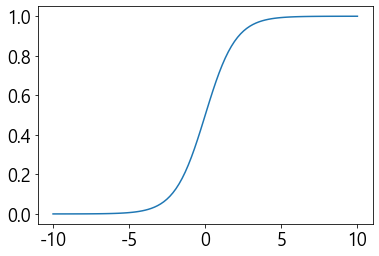

In [16]:
#로지스틱 함수
def logistic(x):
    return 1/(1 + np.exp(-x))

xx = np.linspace(-10, 10, 100)
plt.plot(xx, logistic(xx))
plt.show()

### 로그 함수

In [17]:
print(np.log(0)) #로그 함수는 0이하의 값에는 반응하지 않습니다.
print(np.log(0.8))
print(np.log(1))
print(np.log(10))
print(np.log(100))

-inf
-0.2231435513142097
0.0
2.302585092994046
4.605170185988092


C:\Users\tj\AppData\Local\Temp/ipykernel_11900/3835835177.py:1: RuntimeWarning: divide by zero encountered in log
  print(np.log(0))


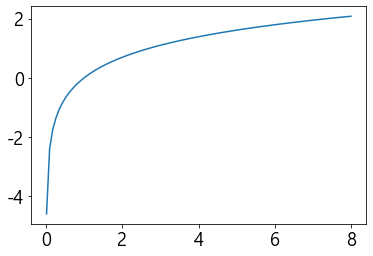

In [19]:
xx = np.linspace(0.01, 8, 100)
yy = np.log(xx)
plt.plot(xx, yy)
plt.show()

### 소프트플러스 함수

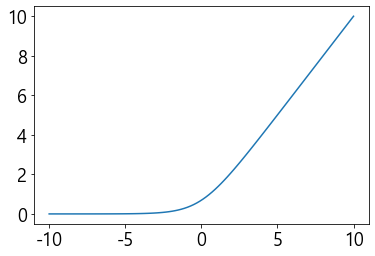

In [20]:
def softplus(x):
    return np.log(1 + np.exp(x))

xx = np.linspace(-10, 10, 100)
plt.plot(xx, softplus(xx))
plt.show()

### 함수의 평행 이동

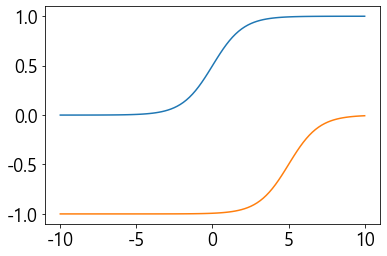

In [23]:
#로지스틱 함수를 오른쪽으로 5 아래로 1 만큼 평행 이동
xx = np.linspace(-10, 10, 100)
plt.plot(xx, logistic(xx), ls='-')
plt.plot(xx, logistic(xx - 5) - 1, ls='-')
plt.show()

### 함수 스케일링

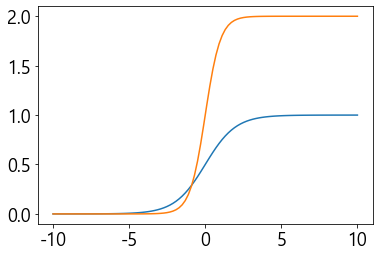

In [24]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, logistic(xx), ls='-')
plt.plot(xx, 2*logistic(2*xx), ls='-')
plt.show()

# 미분

### 수치 미분

In [27]:
#기울기를 구하기 위한 함수
def f(x):
    return x ** 3 - 3 * x ** 2 + x

from scipy.misc import derivative

print(derivative(f, 0, dx = 0.000001))

1.000000000001


### LaTex 표현을 위한 설정

In [28]:
import sympy

sympy.init_printing(use_latex='mathjax')

In [29]:
x = sympy.symbols('x')
print(x)
print(type(x))

x
<class 'sympy.core.symbol.Symbol'>


In [30]:
#함수를 표현
f = x * sympy.exp(x)
print(f)

x*exp(x)


In [31]:
#미분 - diff
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [32]:
#미분 - simplify
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

In [33]:
#심볼을 생성
x, y = sympy.symbols('x y')
# 다변수 함수 생성
f = x ** 2 + 4 * x * y + 4 * y ** 2
f

 2              2
x  + 4⋅x⋅y + 4⋅y 

In [34]:
#편미분 - 여러 개의 입력 변수가 있는데 그 중에서 하나만 미분
#편미분을 수행할 변수를 제외하고는 상수로 취급
sympy.diff(f, x)

2⋅x + 4⋅y

In [35]:
sympy.diff(f, y)

4⋅x + 8⋅y

## 적분

### 부정 적분 - 반 미분, 미분의 반대

In [39]:
#함수를 표현
f = x * sympy.exp(x) + 3
print(f)
#미분
fprime = sympy.diff(f)
print(fprime)

#미분한 도함수를 부정적분 - 상수항은 복원되지 않음
original = sympy.integrate(fprime)
print(original)

x*exp(x) + 3
x*exp(x) + exp(x)
x*exp(x)


### 정적분 - 면적을 구하는 적분

In [41]:
import sympy

sympy.init_printing(use_latex='mathjax')

x = sympy.symbols('x')

#함수 생성
f = x ** 3 - 3 * x ** 2 + x + 6
print(f)

x**3 - 3*x**2 + x + 6


In [43]:
# 부정 적분 수행
F = sympy.integrate(f)
print(F)

#0부터 2까지의 면적 구하기
(F.subs(x, 0) - F.subs(x, 2)).evalf()

x**4/4 - x**3 + x**2/2 + 6*x


-10.0000000000000

In [44]:
#함수를 정의
def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6
#함수를 이용해서 면적 구하기 - 심볼을 이용하는 경우와 결과 동일
#뒤의 숫자는 오차의 상한 값
sp.integrate.quad(f, 0, 2)

(10.0, 1.1102230246251565e-13)

# scikit_learn

## 데이터 표현

### 붓꽃 데이터

In [46]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(type(iris))
print(iris.head())



   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>


In [51]:
# sepal_length, sepal_width, petal_leangth, petal_width 를 가지고 species를
#분류하는 모델을 만드는 경우

#특징 배열
X = iris.drop('species', axis=1)
print(X.head())

#타겟 배열
y = iris['species']
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object
